# Load data that was generated in post_process_ripples

In [1]:
import pickle
import numpy as np
# plotting
from matplotlib import pyplot as plt
import dabest
import pandas as pd
import scipy as stats


Bad key "text.kerning_factor" on line 4 in
D:\ryanh\Anaconda3\envs\ripple_analysis\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
plt.style.use('dark_background')
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

plt.rcParams.update({'font.size': 13})
%config InlineBackend.figure_format = 'retina'

In [3]:
with open('F:/Projects/PAE_PlaceCell/swr_data/post_processed/swr_df_maps.pkl', 'rb') as f:
    df = pickle.load(f)
    ripple_map = pickle.load(f)
    filtered_map = pickle.load(f)
    phase_map = pickle.load(f)
    amp_map = pickle.load(f)
    freq_map = pickle.load(f)


In [4]:
df = df.reset_index()
df['ripple_number'] = np.arange(0,len(df),1)

df = df.drop(columns=['index'])
df

,ripple_number,start_time,end_time,ripple_duration,max_emg,peak_time,peak_channel,peak_amplitude,peak_freq,clipped,session,rat
0,0,66.2624,66.3792,0.1168,0.997065,66.3112,3,6.221621,174.029756,0.000000,LEM3116_S20180715121821,LEM3116
1,1,149.9824,150.1512,0.1688,0.989532,150.1128,1,6.893002,217.563367,0.006667,LEM3116_S20180715121821,LEM3116
2,2,343.5024,343.5952,0.0928,0.995268,343.5472,3,7.195949,212.566470,0.000000,LEM3116_S20180715121821,LEM3116
3,3,344.2784,344.4000,0.1216,0.988154,344.3720,3,5.758124,230.841531,0.000000,LEM3116_S20180715121821,LEM3116
4,4,441.4600,441.6208,0.1608,0.986499,441.5536,4,5.181640,158.973213,0.000000,LEM3116_S20180715121821,LEM3116
...,...,...,...,...,...,...,...,...,...,...,...,...
52605,52605,115.8936,116.0488,0.1552,0.445488,115.9440,4,5.989715,209.285805,0.000000,RH16_S20161207130000,RH16
52606,52606,769.6008,769.6736,0.0728,0.170989,769.6200,2,7.993862,192.961786,0.006667,RH16_S20161207130000,RH16
52607,52607,1106.5360,1106.6128,0.0768,0.118062,1106.5720,2,9.221199,205.013810,0.000000,RH16_S20161207130000,RH16
52608,52608,1189.0416,1189.2408,0.1992,0.142649,1189.1168,2,7.268366,205.098888,0.013333,RH16_S20161207130000,RH16


## group affiliation

In [5]:
control=('RH13','RH14','LS21','LS23','LE2821','LE2823','LEM3116','LEM3120','LEM3216')
pae=('RH11','RH16','LS17','LS19','LE2813','LEM3124','LEM3206','LEM3246')

In [6]:
df['group'] = np.ones_like(df.session)

regstr = '|'.join(control)
idx = df['session'].str.upper().str.contains(regstr)    
df.group[idx] = 'control'

regstr = '|'.join(pae)
idx = df['session'].str.upper().str.contains(regstr)    
df.group[idx] = 'pae'

df

<ipython-input-6-4791693a64dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.group[idx] = 'control'
<ipython-input-6-4791693a64dc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.group[idx] = 'pae'


,ripple_number,start_time,end_time,ripple_duration,max_emg,peak_time,peak_channel,peak_amplitude,peak_freq,clipped,session,rat,group
0,0,66.2624,66.3792,0.1168,0.997065,66.3112,3,6.221621,174.029756,0.000000,LEM3116_S20180715121821,LEM3116,control
1,1,149.9824,150.1512,0.1688,0.989532,150.1128,1,6.893002,217.563367,0.006667,LEM3116_S20180715121821,LEM3116,control
2,2,343.5024,343.5952,0.0928,0.995268,343.5472,3,7.195949,212.566470,0.000000,LEM3116_S20180715121821,LEM3116,control
3,3,344.2784,344.4000,0.1216,0.988154,344.3720,3,5.758124,230.841531,0.000000,LEM3116_S20180715121821,LEM3116,control
4,4,441.4600,441.6208,0.1608,0.986499,441.5536,4,5.181640,158.973213,0.000000,LEM3116_S20180715121821,LEM3116,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52605,52605,115.8936,116.0488,0.1552,0.445488,115.9440,4,5.989715,209.285805,0.000000,RH16_S20161207130000,RH16,pae
52606,52606,769.6008,769.6736,0.0728,0.170989,769.6200,2,7.993862,192.961786,0.006667,RH16_S20161207130000,RH16,pae
52607,52607,1106.5360,1106.6128,0.0768,0.118062,1106.5720,2,9.221199,205.013810,0.000000,RH16_S20161207130000,RH16,pae
52608,52608,1189.0416,1189.2408,0.1992,0.142649,1189.1168,2,7.268366,205.098888,0.013333,RH16_S20161207130000,RH16,pae


## plot by animal

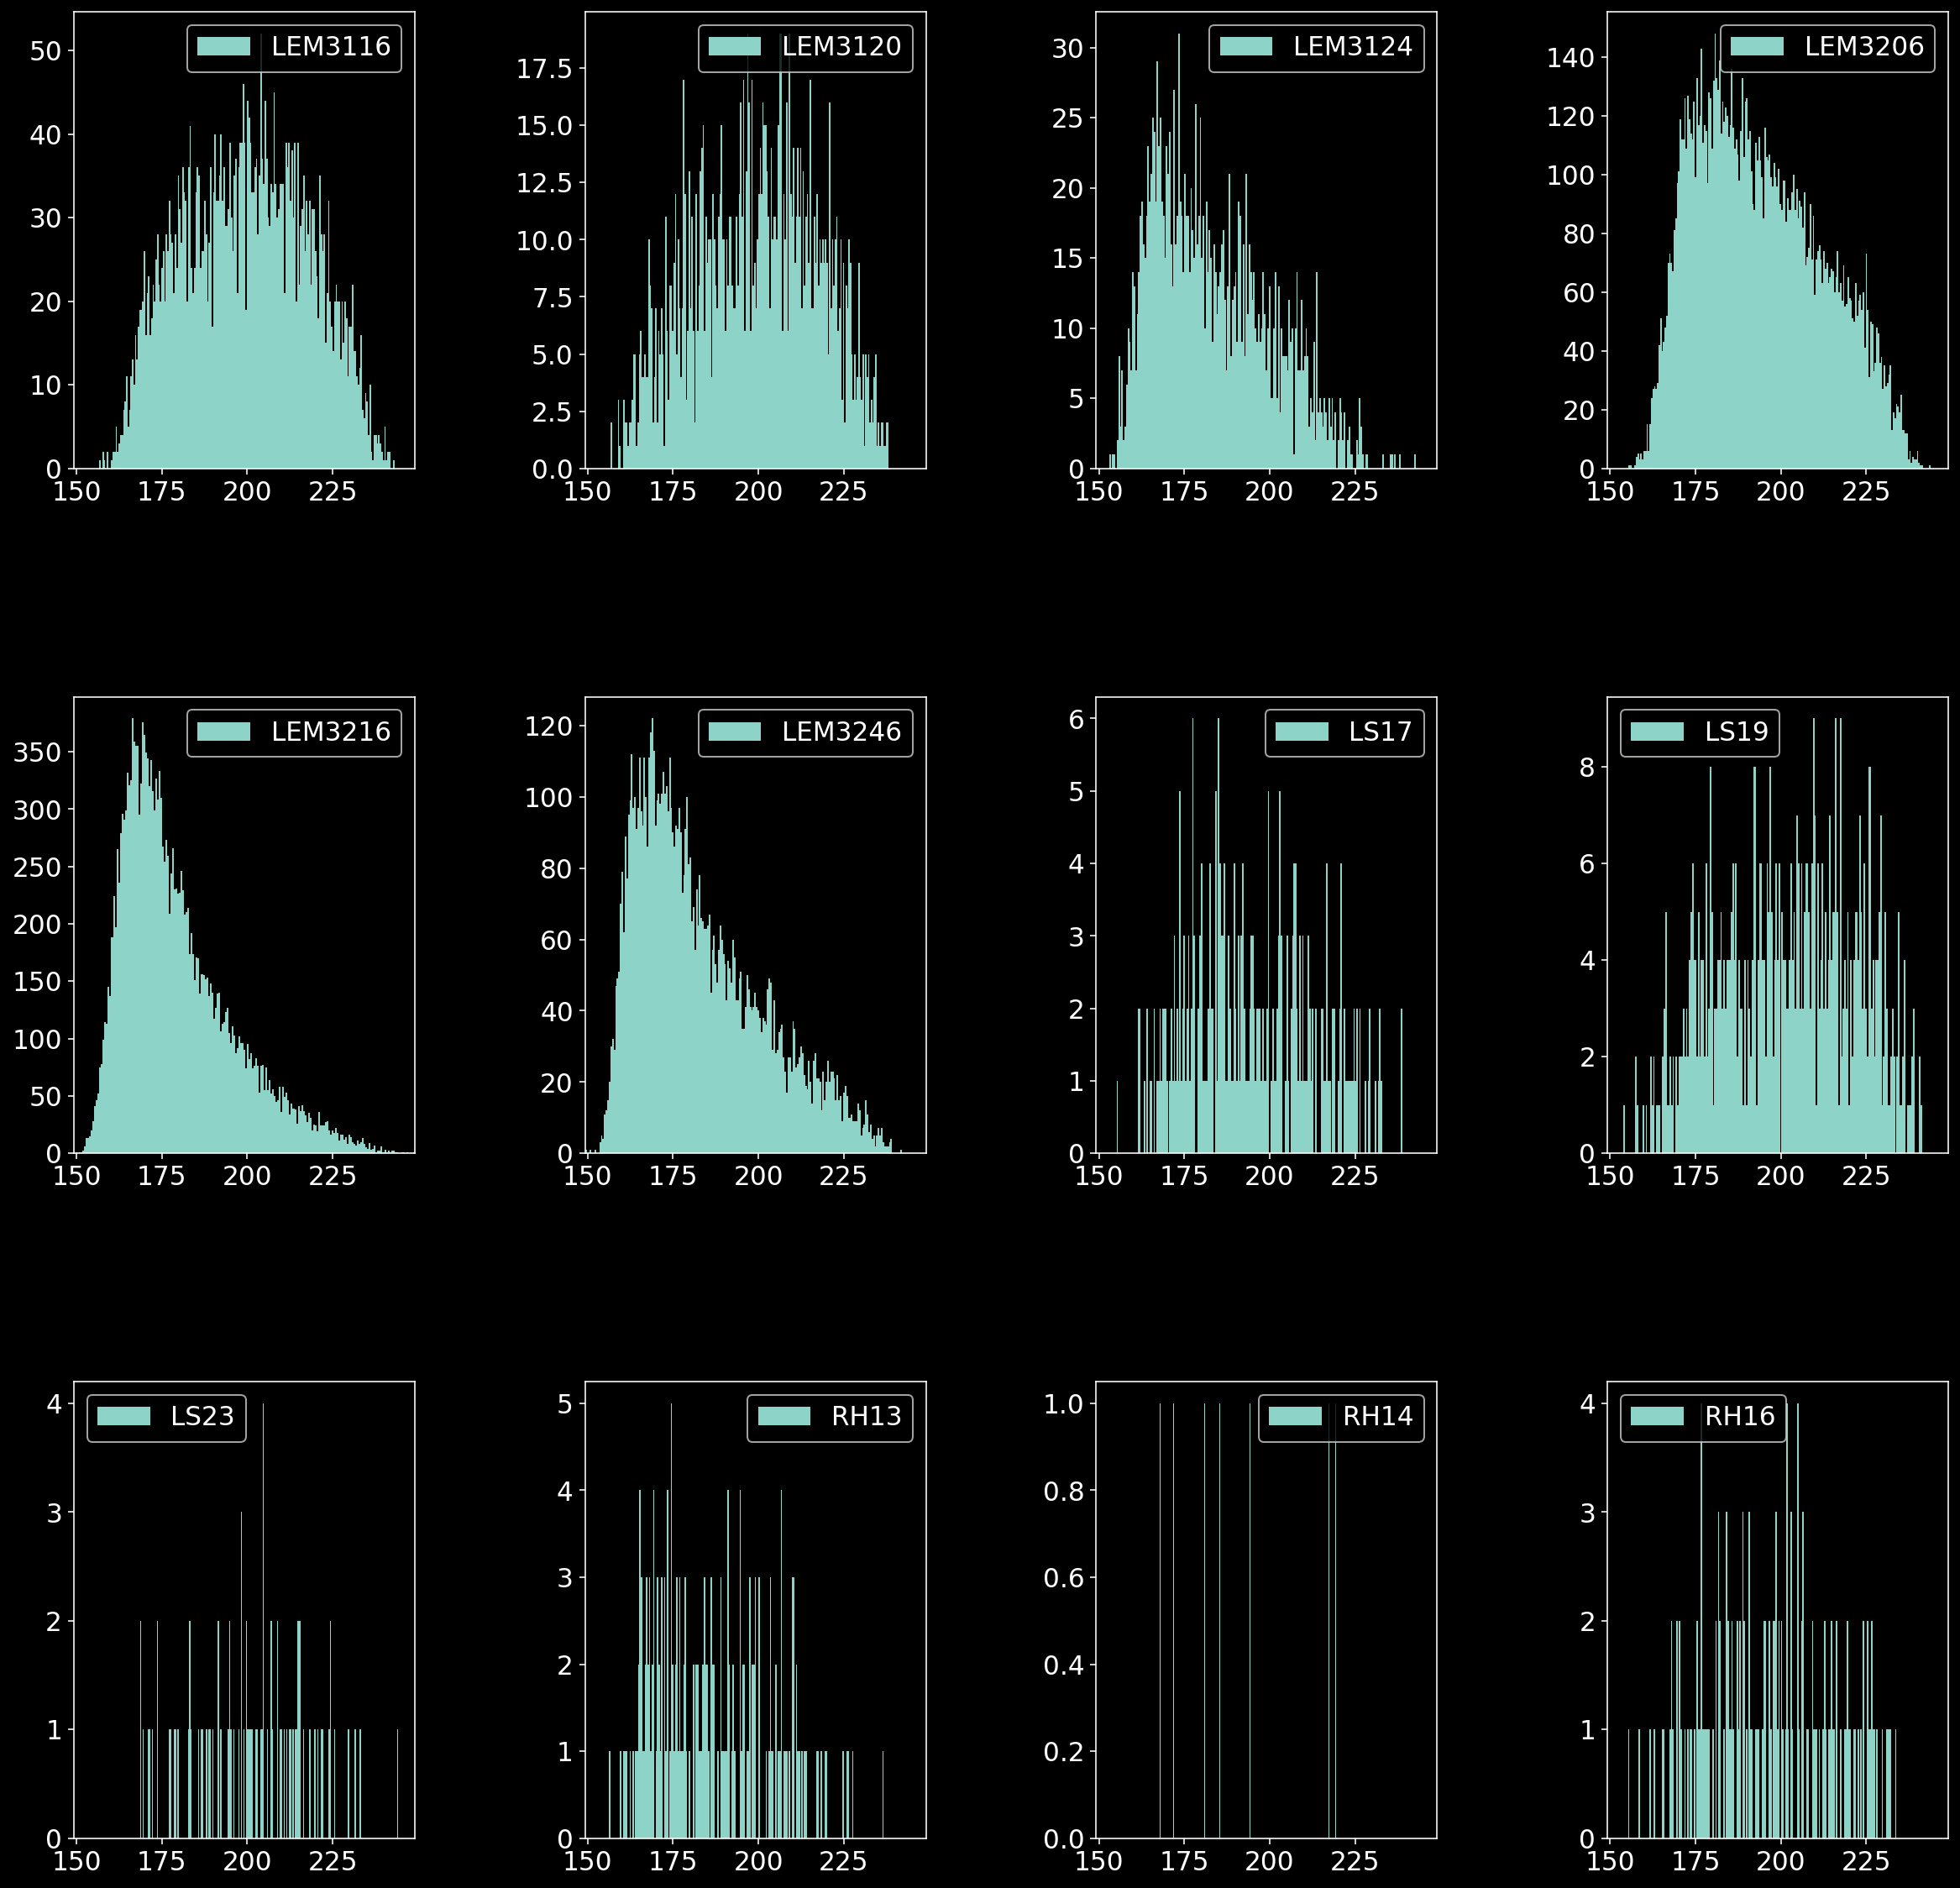

In [7]:
df['rat'] = df["session"].str.split("_", n = 1, expand = True)[0]

# for rat in pd.unique(df.rat):
#     idx = df.rat == rat
#     plt.figure(figsize=(5,5))
#     plt.hist(df.peak_amplitude[idx],200,alpha=0.5,label=rat)
#     plt.xlim(min(df.peak_amplitude),max(df.peak_amplitude))
#     plt.legend()

    
# plt.figure(figsize=(10,10))
# for rat in pd.unique(df.rat):
#     idx = df.rat == rat
#     plt.hist(df.peak_amplitude[idx],200,alpha=0.5,label=rat)
#     plt.legend()

fig, axs = plt.subplots(3,4, figsize=(20, 20), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
axs = axs.ravel()

for i,rat in enumerate(pd.unique(df.rat)):
    idx = df.rat == rat
    axs[i].hist(df.peak_freq[idx],200,label=rat)
    axs[i].set_xlim(min(df.peak_freq),max(df.peak_freq))
    axs[i].legend()


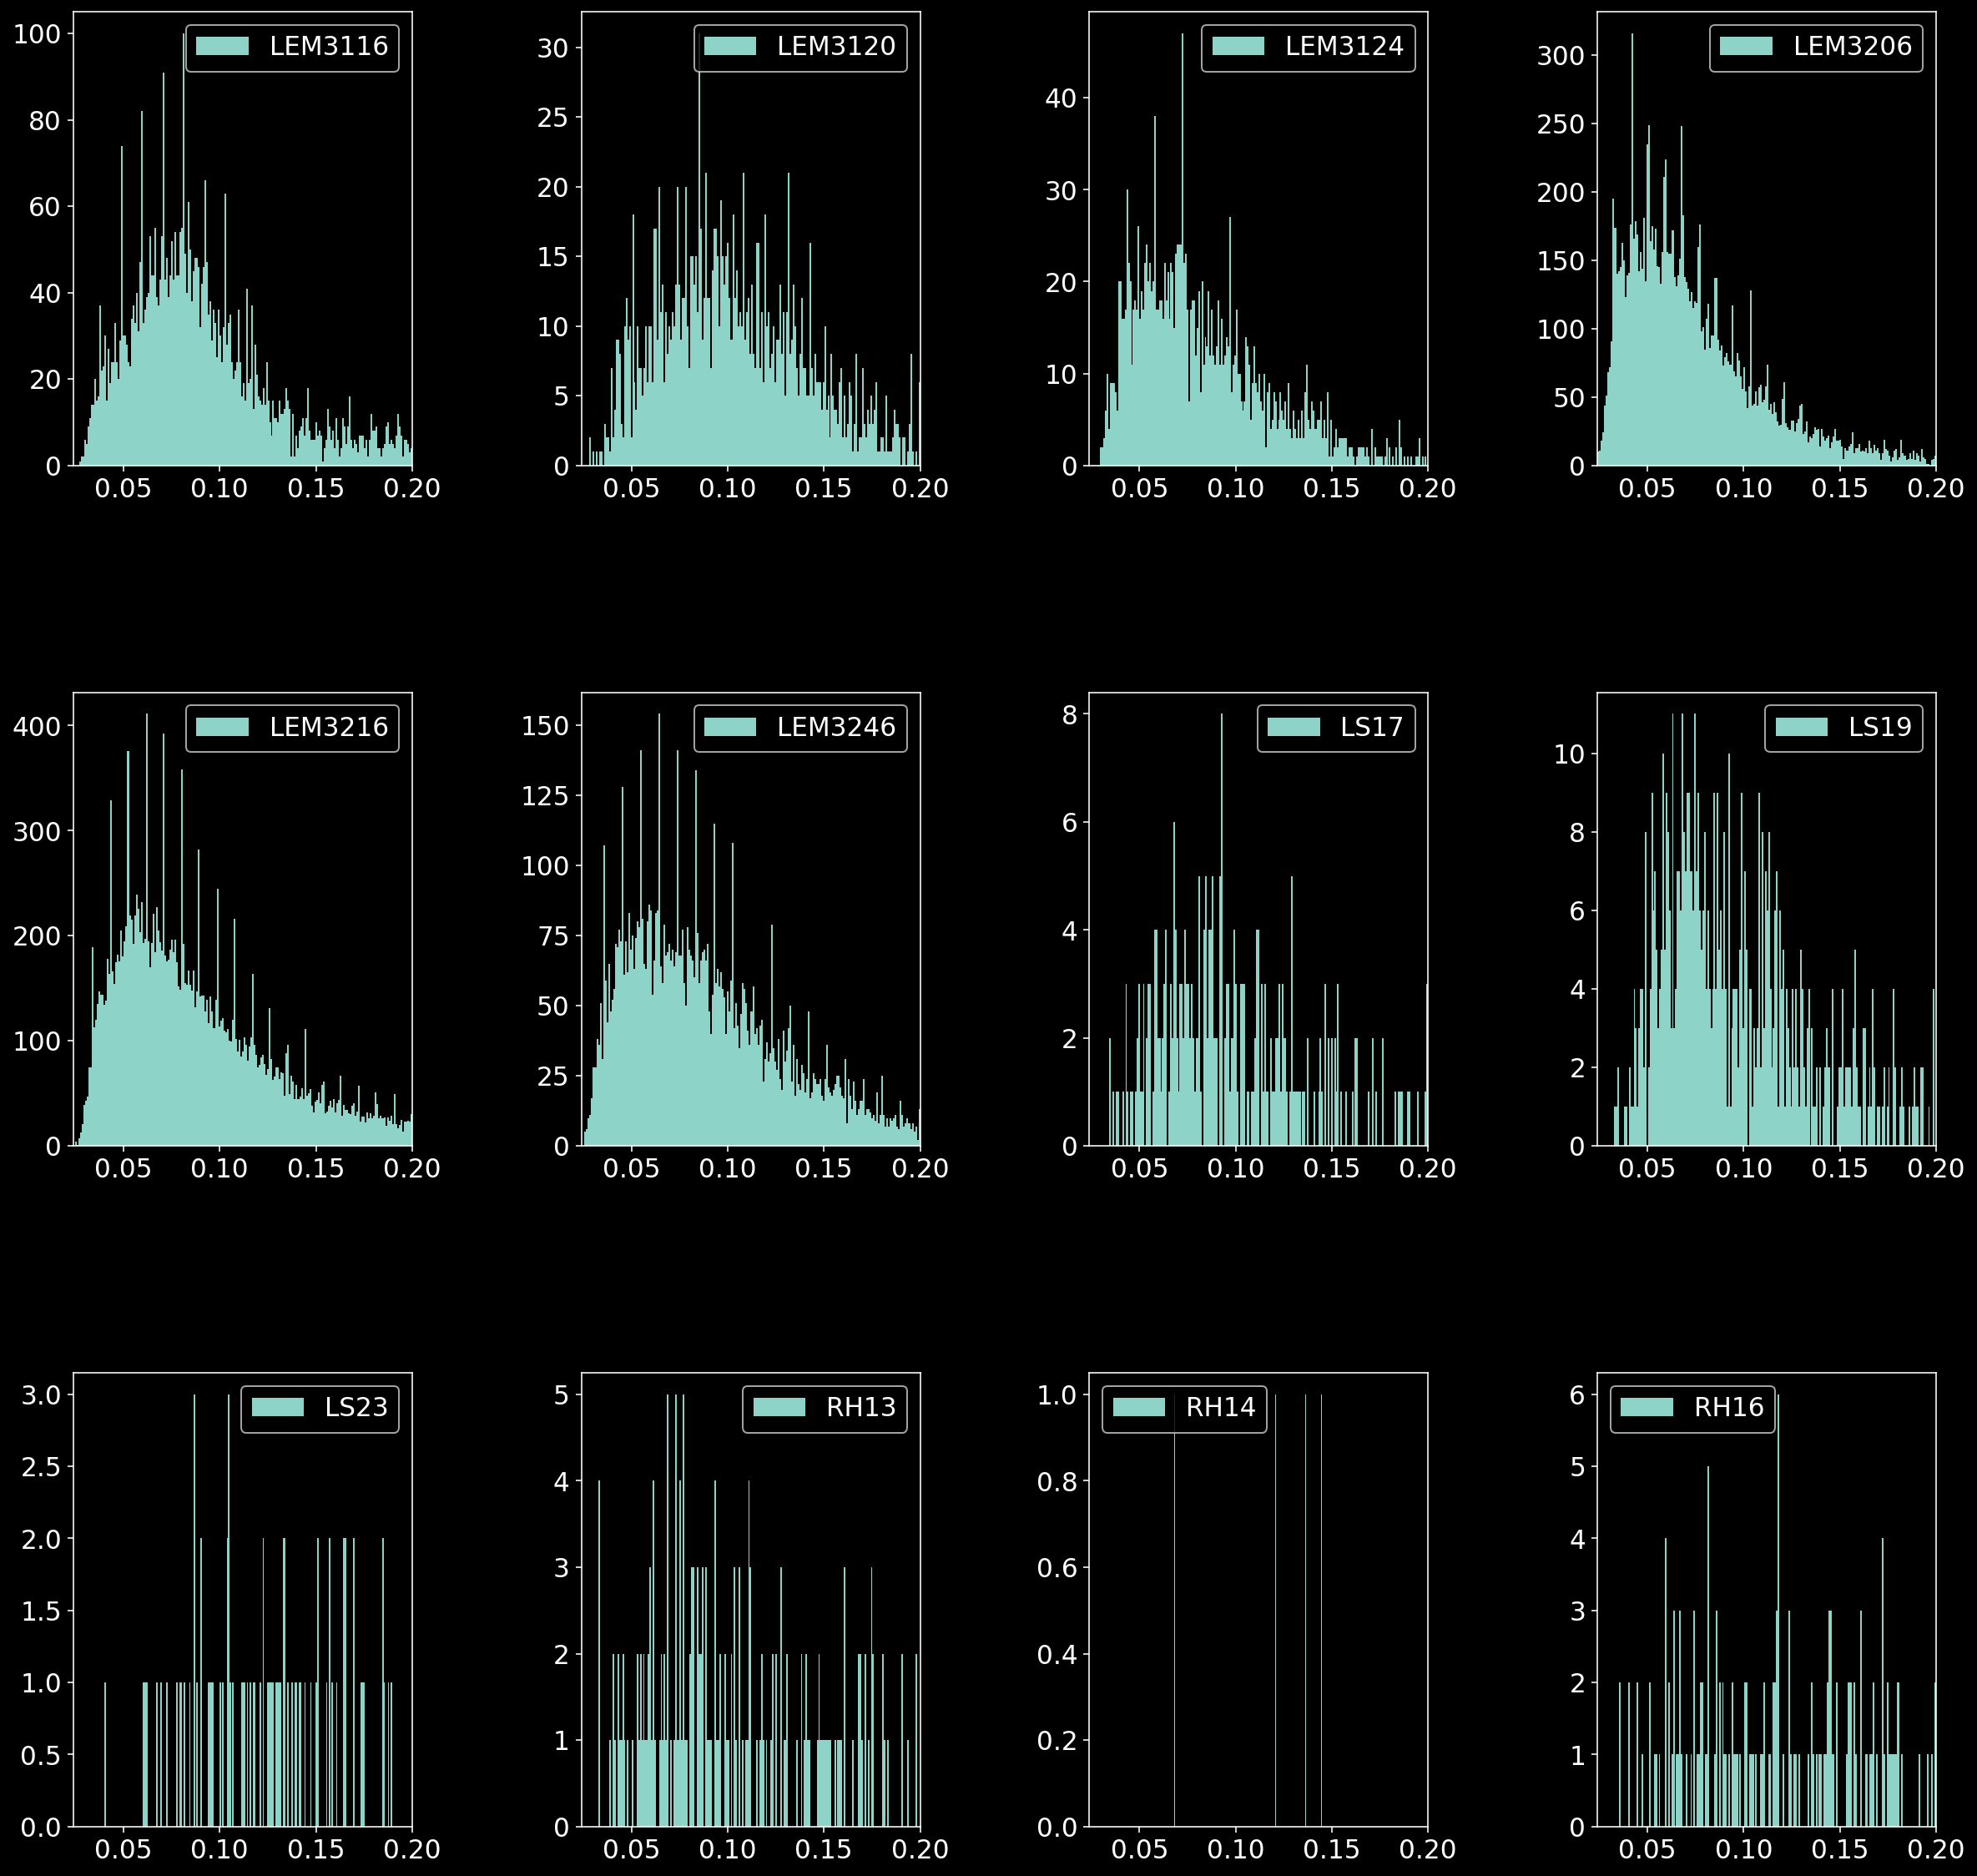

In [8]:
fig, axs = plt.subplots(3,4, figsize=(20, 20), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
axs = axs.ravel()

for i,rat in enumerate(pd.unique(df.rat)):
    idx = df.rat == rat
    axs[i].hist(df.ripple_duration[idx],200,label=rat)
    axs[i].set_xlim(min(df.ripple_duration),max(df.ripple_duration))
    axs[i].legend()


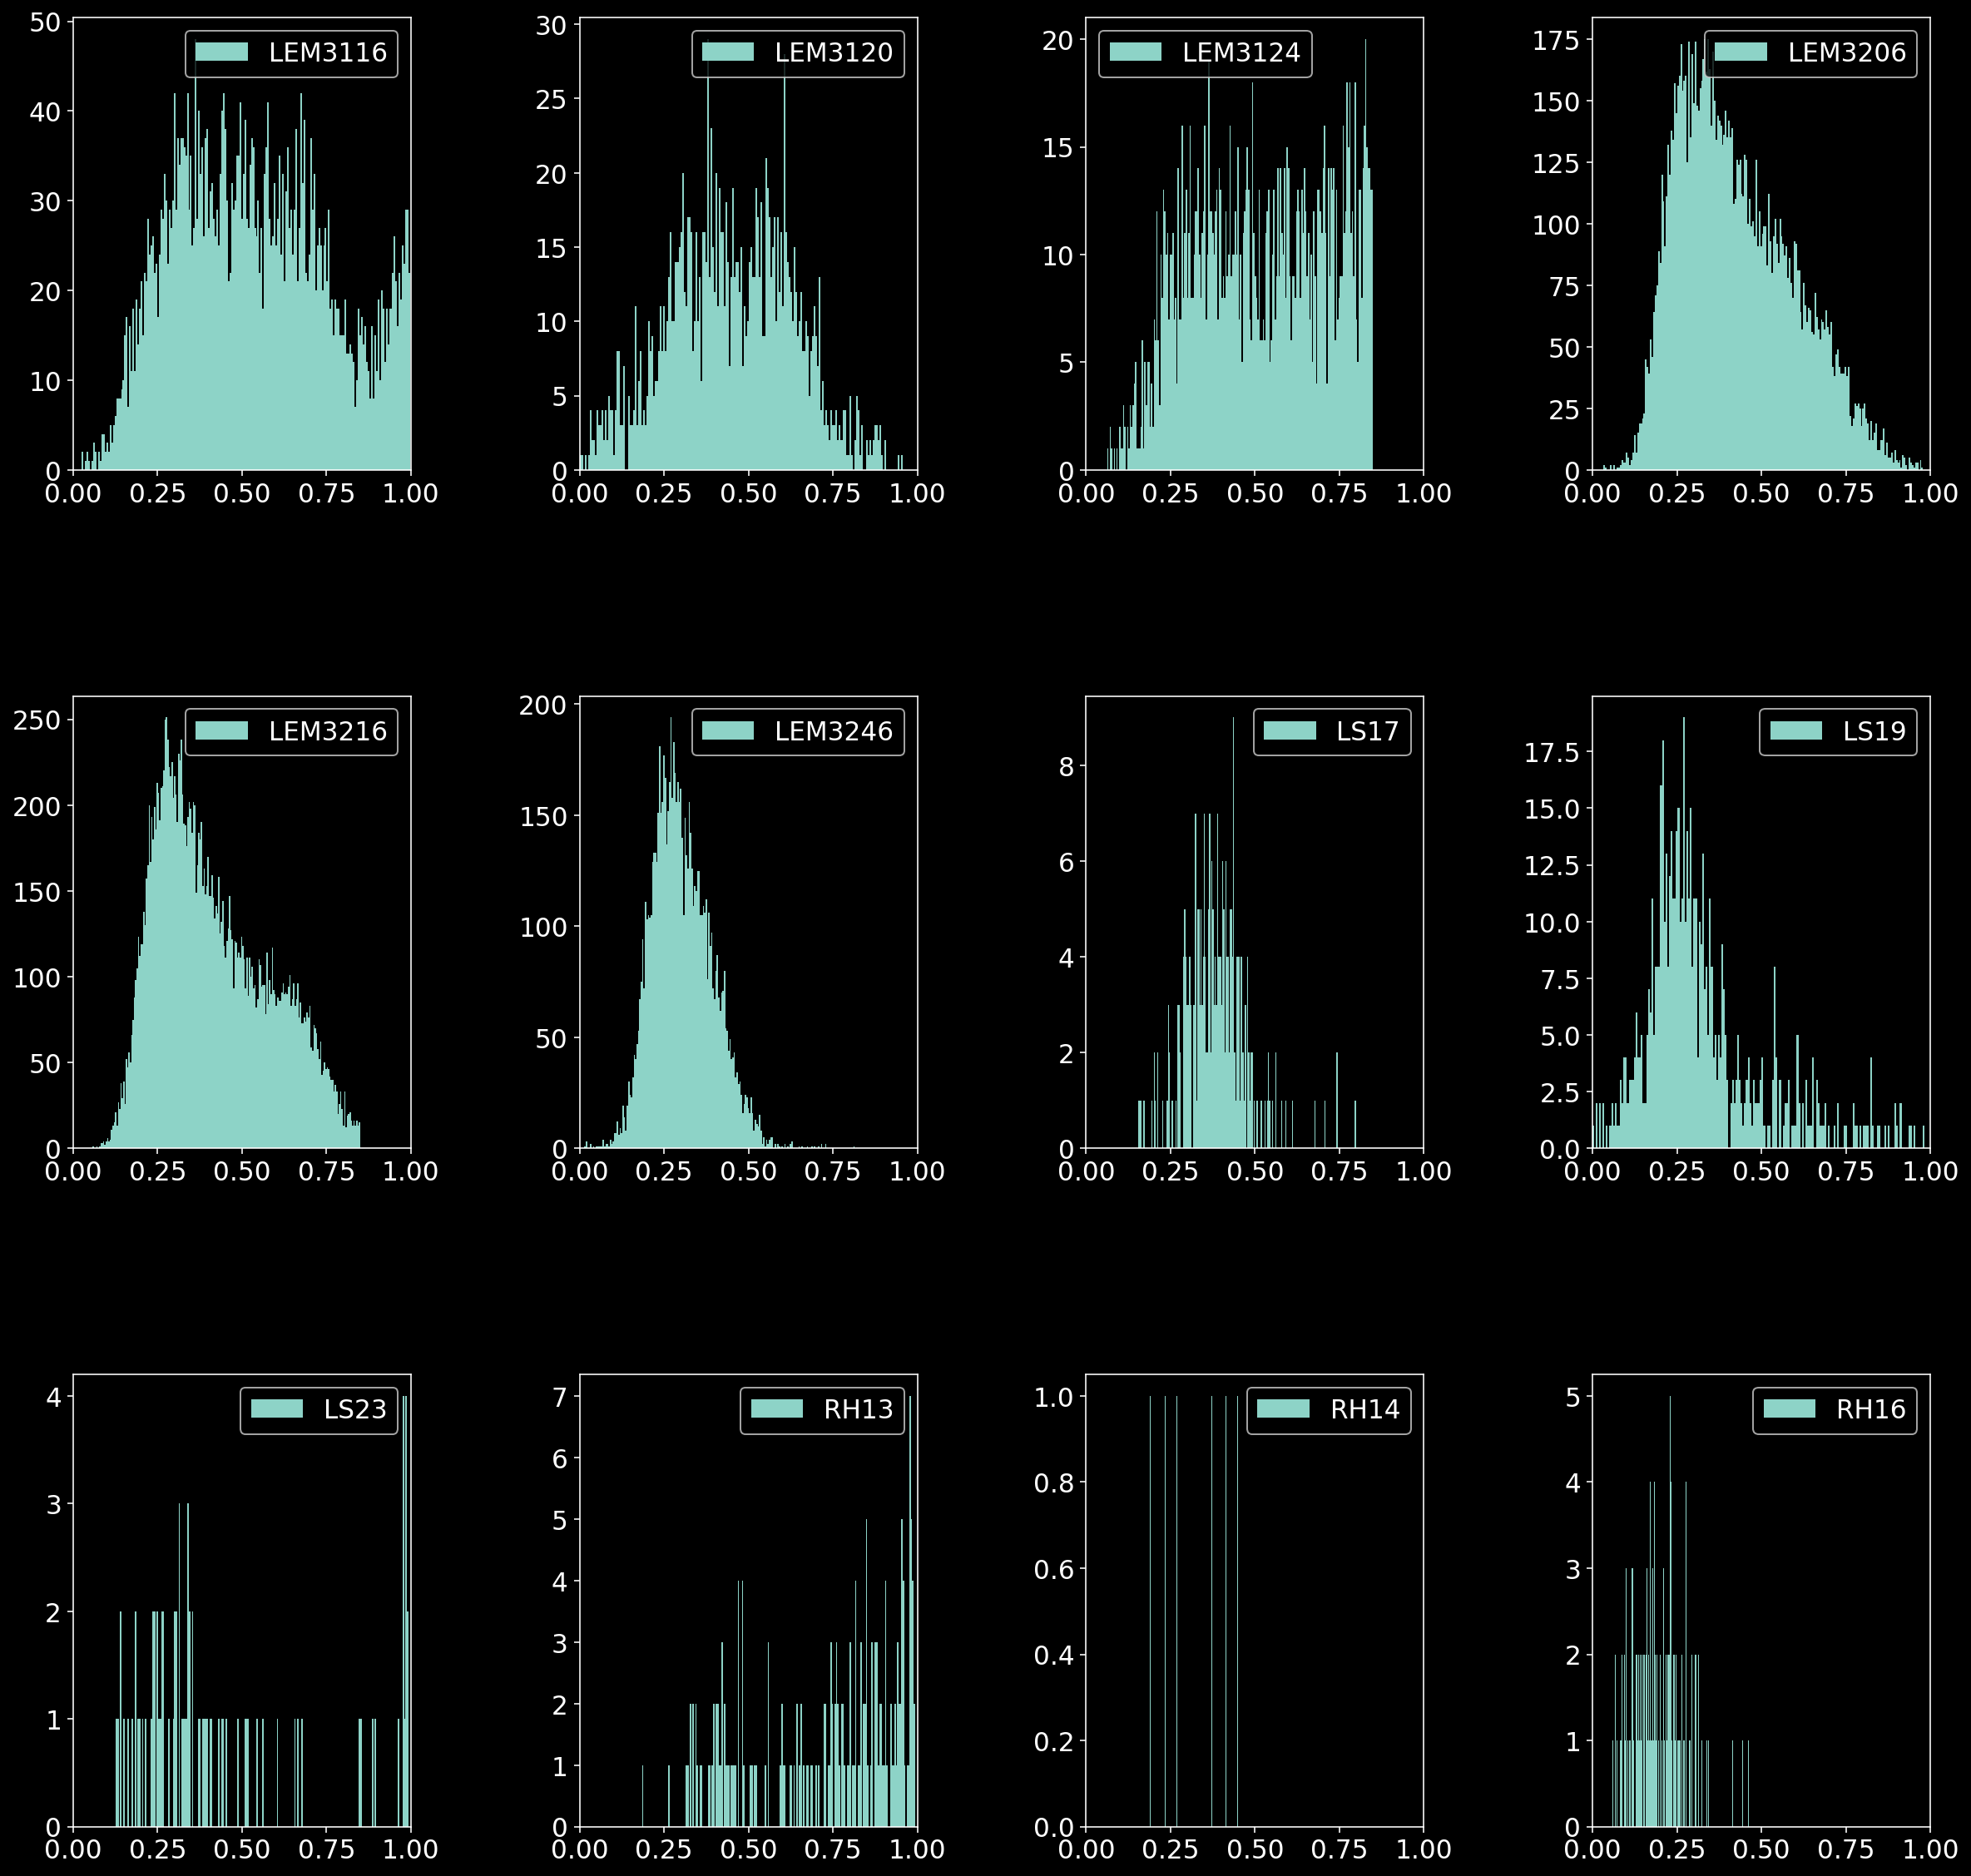

In [9]:
fig, axs = plt.subplots(3,4, figsize=(20, 20), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
axs = axs.ravel()

for i,rat in enumerate(pd.unique(df.rat)):
    idx = df.rat == rat
    axs[i].hist(df.max_emg[idx],200,label=rat)
    axs[i].set_xlim(0,1)
    axs[i].legend()

In [29]:
plt.style.use('seaborn-paper')
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

plt.rcParams.update({'font.size': 13})
%config InlineBackend.figure_format = 'retina'

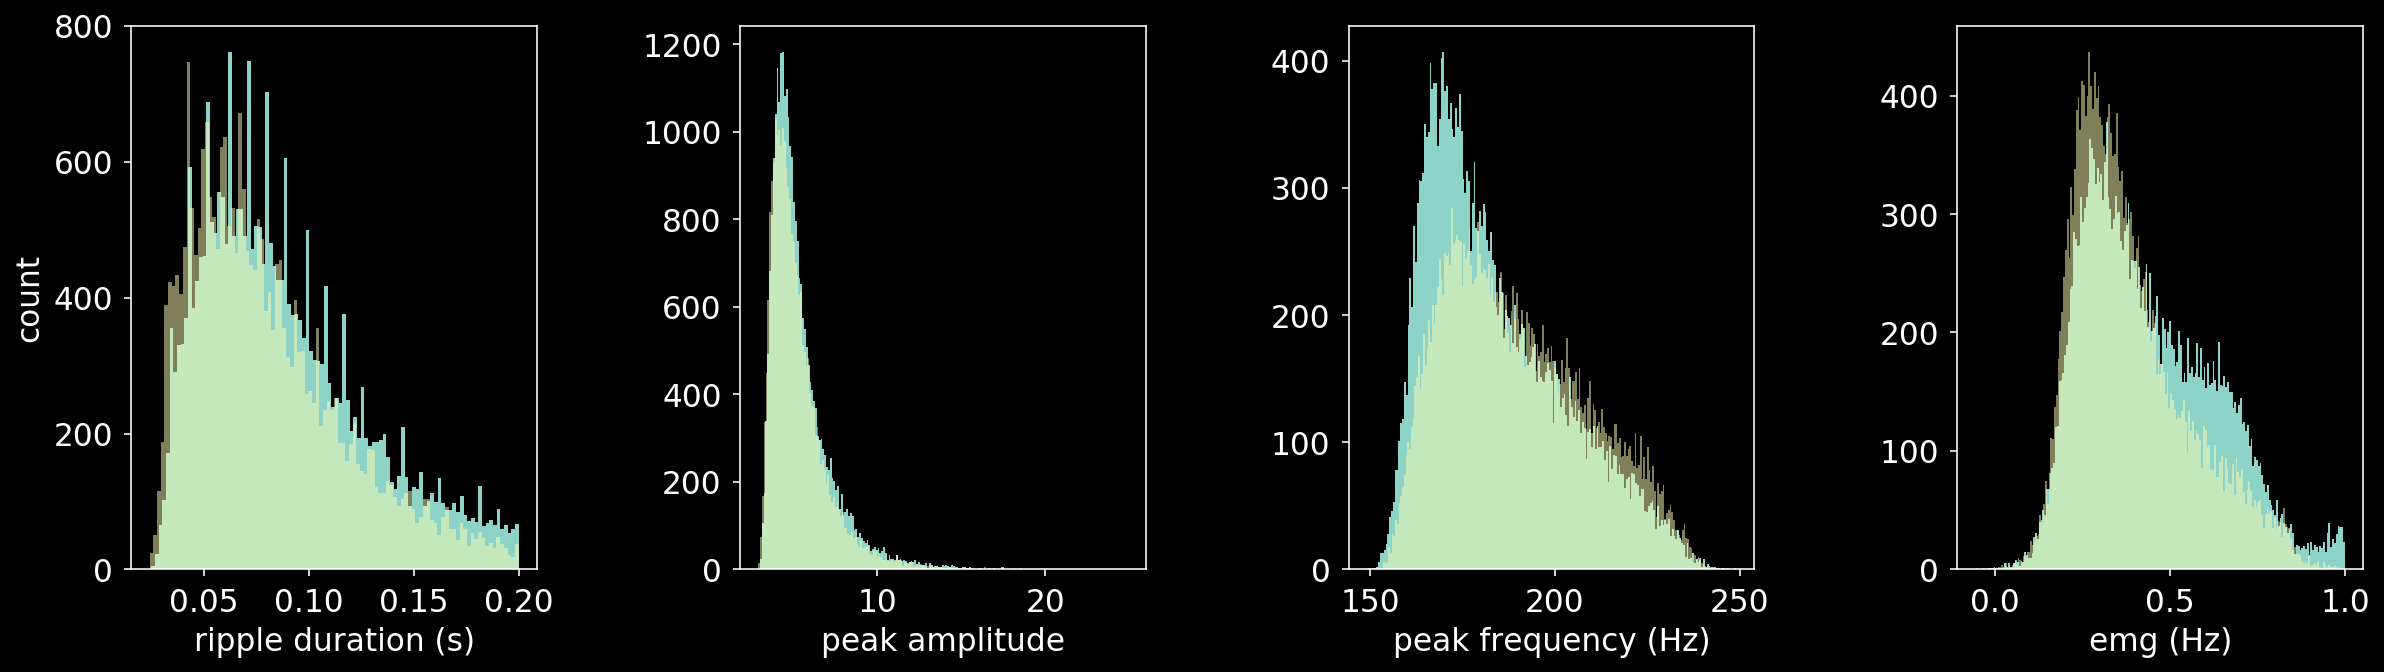

In [11]:
fig, axs = plt.subplots(1,4, figsize=(20, 5), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
axs = axs.ravel()

axs[0].hist(df.ripple_duration[df.group == 'control'],100)
axs[0].hist(df.ripple_duration[df.group == 'pae'],100,alpha=0.5)
axs[0].set_ylabel('count')
axs[0].set_xlabel('ripple duration (s)')

axs[1].hist(df.peak_amplitude[df.group == 'control'],200)
axs[1].hist(df.peak_amplitude[df.group == 'pae'],200,alpha=0.5)
axs[1].set_xlabel('peak amplitude')

axs[2].hist(df.peak_freq[df.group == 'control'],200)
axs[2].hist(df.peak_freq[df.group == 'pae'],200,alpha=0.5)
axs[2].set_xlabel('peak frequency (Hz)')

axs[3].hist(df.max_emg[df.group == 'control'],200)
axs[3].hist(df.max_emg[df.group == 'pae'],200,alpha=0.5)
axs[3].set_xlabel('emg (Hz)')
plt.show()

## Inter-ripple-frequency

In [27]:
def inter_ripple_freq(df):
    intra_ripple_interval = []
    for r in pd.unique(df.session):
        intra_ripple_interval.append(np.diff(df.peak_time[df.session == r]))
    return np.hstack(intra_ripple_interval)

def bin_data(x,min_t=0,max_t=1,dt=0.01):
    
    bin_edges = np.arange(min_t,max_t,dt)
    bin_centers = np.arange(min_t+dt,max_t,dt)
    hist, bin_edges = np.histogram(x,bins=bin_edges)
    return hist,bin_centers,bin_edges

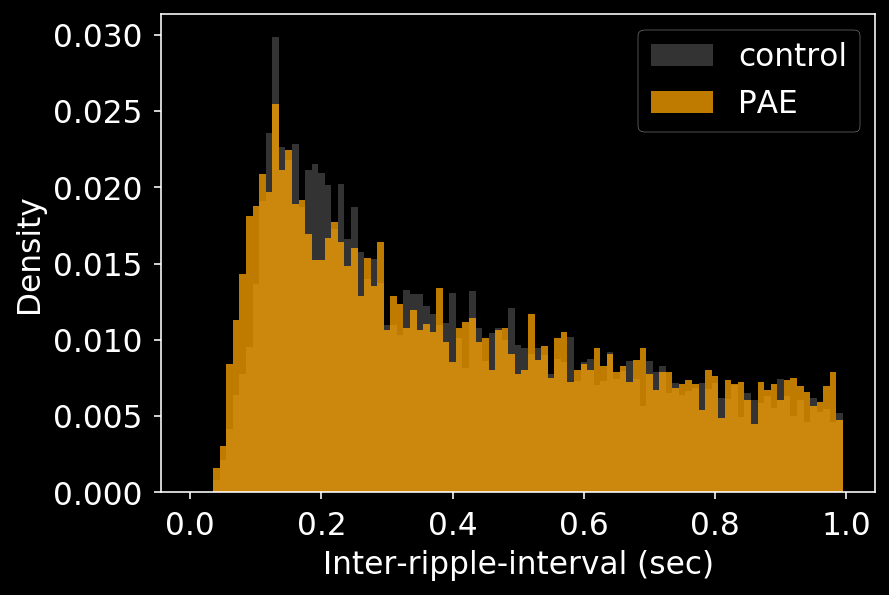

In [30]:


hist_control,bin_centers,bin_edges = bin_data(inter_ripple_freq(df[df.group=='control']))
plt.bar(bin_centers,hist_control/hist_control.sum(),width=0.01,color='#333333',label='control')
# plt.plot(bin_centers,hist_control/hist_control.sum(),color='#333333')

hist_pae,bin_centers,bin_edges = bin_data(inter_ripple_freq(df[df.group=='pae']))
plt.bar(bin_centers,hist_pae/hist_pae.sum(),width=0.01,alpha=.75,color='orange',label='PAE')
# plt.plot(bin_centers,hist_pae/hist_pae.sum(),color='orange')

plt.xlabel('Inter-ripple-interval (sec)')
plt.ylabel('Density')
plt.legend()
# plt.xscale('log')

In [31]:
from scipy.stats import ranksums,mannwhitneyu

x = inter_ripple_freq(df[df.group=='control'])
y = inter_ripple_freq(df[df.group=='pae'])
mdl = ranksums(x[x<=1],y[y<=1])
print(mdl)

print(np.median(hist_control))
print(np.median(hist_pae))

RanksumsResult(statistic=-0.8726985729870596, pvalue=0.3828273957269107)
93.0
66.0


In [32]:
data = pd.DataFrame(data=x[x<=0.5],columns=['inter_ripple_freq'])
data['group'] = 'control'

data_ = pd.DataFrame(data=y[y<=0.5],columns=['inter_ripple_freq'])
data_['group'] = 'pae'

data = data.append(data_,ignore_index=True)

data

,inter_ripple_freq,group
0,0.4352,control
1,0.1112,control
2,0.4704,control
3,0.3696,control
4,0.2712,control
...,...,...
11858,0.1496,pae
11859,0.1472,pae
11860,0.1064,pae
11861,0.1440,pae


D:\ryanh\Anaconda3\envs\ripple_analysis\lib\site-packages\dabest\_classes.py:791: UserWarning: The lower limit of the BCa interval cannot be computed. It is set to the effect size itself. All bootstrap values were likely all the same.
  warnings.warn(err_temp.substitute(lim_type="lower"),
D:\ryanh\Anaconda3\envs\ripple_analysis\lib\site-packages\dabest\_classes.py:796: UserWarning: The upper limit of the BCa interval cannot be computed. It is set to the effect size itself. All bootstrap values were likely all the same.
  warnings.warn(err_temp.substitute(lim_type="upper"),


Text(0, 0.5, 'inter ripple frequency (sec)')

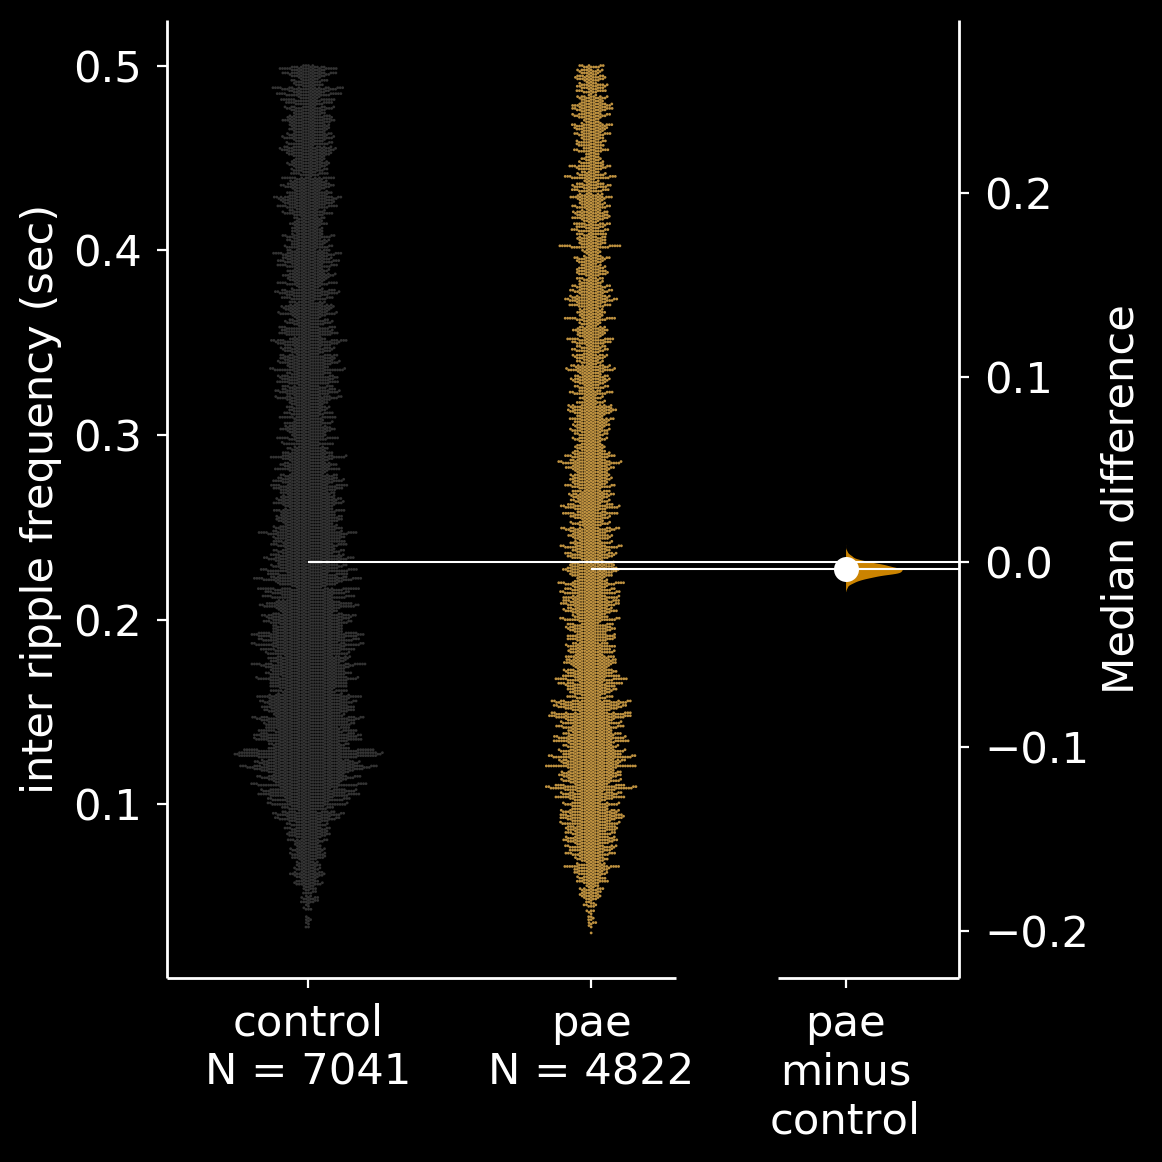

In [33]:
import dabest

inter_ripple_df = dabest.load(data=data, x="group", y="inter_ripple_freq",
                          idx=("control", "pae"))

flatui = ["#333333","#FFA500"]
ax = inter_ripple_df.median_diff.plot(raw_marker_size=1,custom_palette=flatui,fig_size=(6, 6))
ax.axes[0].set_ylabel("inter ripple frequency (sec)")



Text(62.00000000000003, 0.5, 'inter ripple frequency (sec)')

D:\ryanh\Anaconda3\envs\ripple_analysis\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


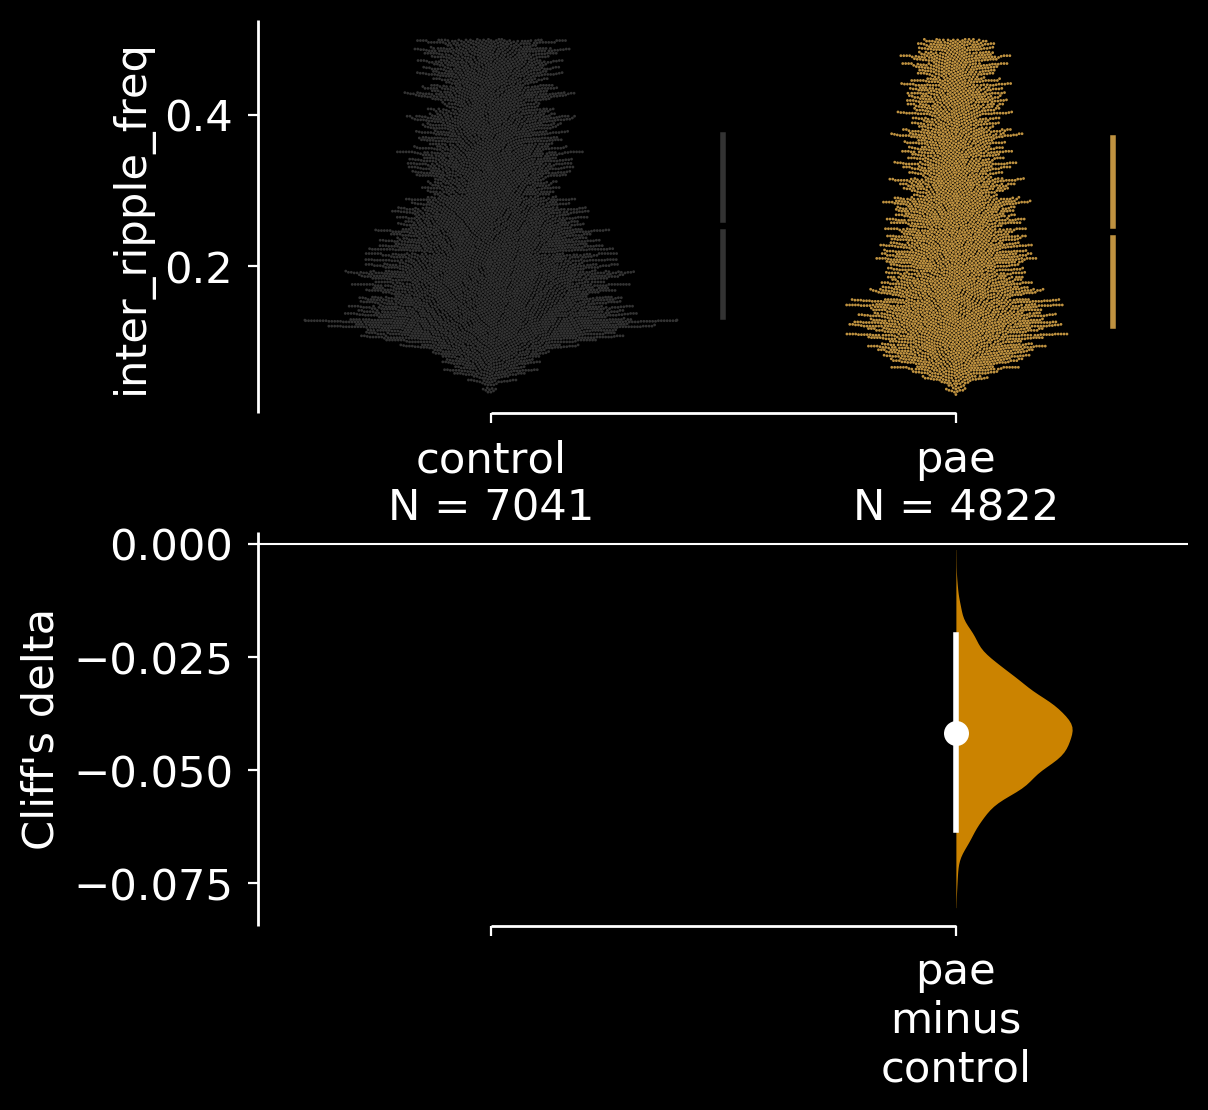

In [34]:
inter_ripple_df.cliffs_delta.plot(raw_marker_size=1,custom_palette=flatui,fig_size=(6, 6),float_contrast=False)
ax.axes[0].set_ylabel("inter ripple frequency (sec)")

In [110]:
inter_ripple_df.cliffs_delta.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,pct_low,pct_high,pct_interval_idx,bootstraps,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_brunner_munzel,statistic_brunner_munzel
0,control,pae,7363,4849,Cliff's delta,False,-0.041065,95,-0.06175,-0.019829,...,-0.062044,-0.020294,"(125, 4875)","[-0.07724290831515968, -0.0763570770306864, -0...",5000,12345,0.0,5000,0.000141,-3.807859


## calculate peak ripple interval & coefficient of variation 

coefficient of variation for a log normal distribution =

$\sqrt{exp(\sigma^2)-1}$

In [12]:
def bin_data(x,min_t=0,max_t=1,dt=0.01):
    bin_edges = np.arange(min_t,max_t,dt)
    bin_centers = np.arange(min_t+dt,max_t,dt)
    hist, bin_edges = np.histogram(x,bins=bin_edges)
    return hist,bin_centers,bin_edges

def peak_inter_ripple_freq(df):
    intra_ripple_interval = []
    cv = []
    hists = []
    for r in pd.unique(df.session):
        if sum(df.session == r) < 2:
            continue
            
        hist,bin_centers,bin_edges=bin_data(np.diff(df.peak_time[df.session == r]))
        if sum(hist) == 0:
            continue
            
        x = np.diff(df.peak_time[df.session == r])  
        x = x[x<=1]
        
        if len(x) < 5:
            continue
            
#         cv.append(np.std(x)/np.mean(x))
        cv.append(np.sqrt(np.exp(np.std(x)**2)-1))
        
        intra_ripple_interval.append(bin_centers[np.argmax(hist)])
        
        hists.append(hist/hist.sum())
        
    hists = np.vstack(np.array(hists))
    return intra_ripple_interval,cv,hists

iri_control,cv_control,hists_control = peak_inter_ripple_freq(df[df.group=='control'])
iri_pae,cv_pae,hists_pae = peak_inter_ripple_freq(df[df.group=='pae'])


In [35]:
iri,cv,hists = peak_inter_ripple_freq(df)

(array([69., 50.,  7.,  5.,  1.,  0.,  0.,  2.,  1.,  1.]),
 array([0.07 , 0.148, 0.226, 0.304, 0.382, 0.46 , 0.538, 0.616, 0.694,
        0.772, 0.85 ]),
 <a list of 10 Patch objects>)

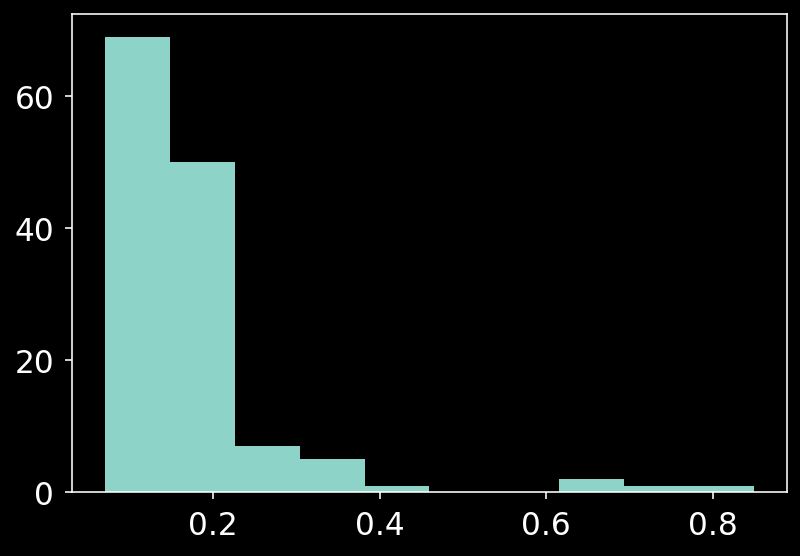

In [36]:
plt.hist(iri)

In [13]:
data = pd.DataFrame(data=iri_control,columns=['inter_ripple_freq'])
data['cv'] = cv_control
data['group'] = 'Control'


data_ = pd.DataFrame(data=iri_pae,columns=['inter_ripple_freq'])
data_['cv'] = cv_pae
data_['group'] = 'PAE'

data = data.append(data_,ignore_index=True)

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,pct_low,pct_high,pct_interval_idx,bootstraps,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_brunner_munzel,statistic_brunner_munzel
0,Control,PAE,60,76,Cliff's delta,False,-0.056579,95,-0.251754,0.140132,...,-0.252851,0.138377,"(125, 4875)","[-0.4278508771929824, -0.3710526315789474, -0....",5000,12345,0.5756,5000,0.573846,-0.56383


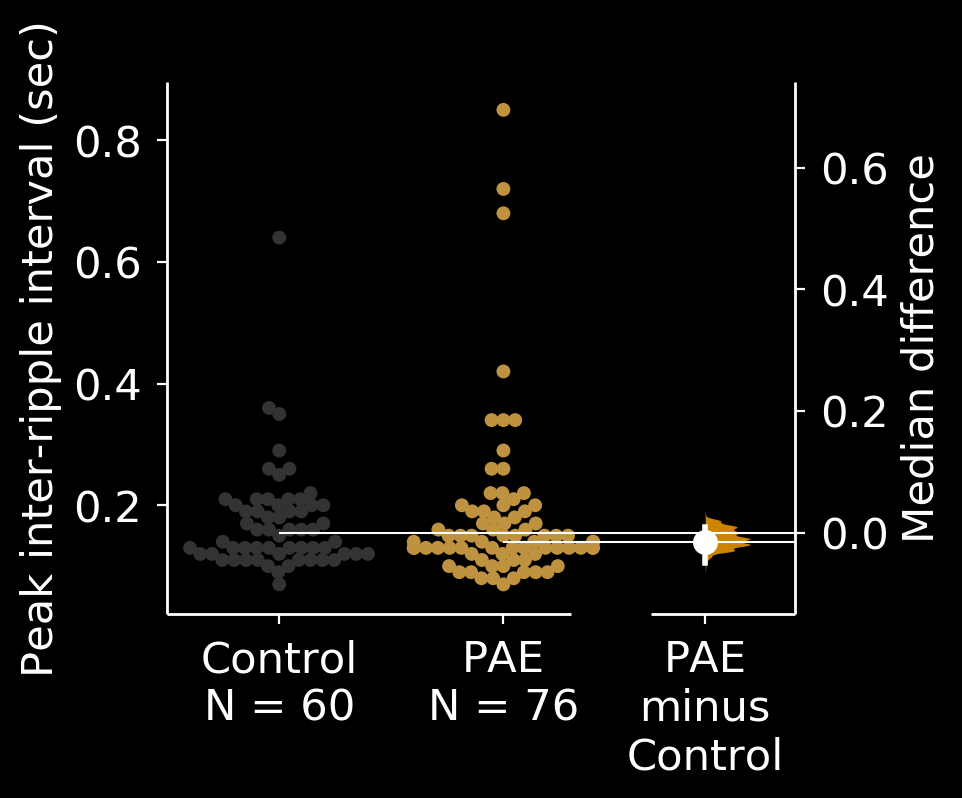

In [14]:
inter_ripple_df = dabest.load(data=data, x="group", y="inter_ripple_freq",
                          idx=("Control", "PAE"))

flatui = ["#333333","#FFA500"]
ax = inter_ripple_df.median_diff.plot(raw_marker_size=5,custom_palette=flatui)
ax.axes[0].set_ylabel("Peak inter-ripple interval (sec)")

inter_ripple_df.cliffs_delta.results

In [199]:
# data.cv = np.log(data.cv)

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,pct_low,pct_high,pct_interval_idx,bootstraps,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_brunner_munzel,statistic_brunner_munzel
0,Control,PAE,60,76,Cliff's delta,False,0.373684,95,0.185965,0.537281,...,0.194298,0.542982,"(125, 4875)","[0.058771929824561475, 0.07017543859649122, 0....",5000,12345,0.0002,5000,0.000077,4.083533


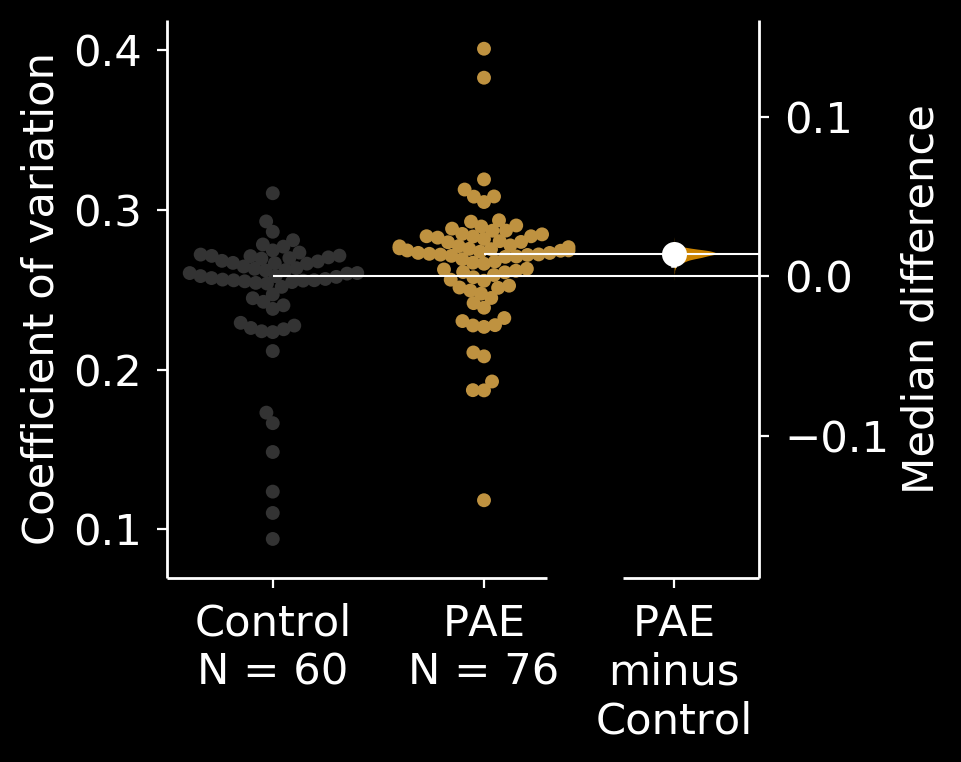

In [15]:
inter_ripple_df = dabest.load(data=data, x="group", y="cv",
                          idx=("Control", "PAE"))

flatui = ["#333333","#FFA500"]
ax = inter_ripple_df.median_diff.plot(raw_marker_size=5,custom_palette=flatui)
ax.axes[0].set_ylabel("Coefficient of variation")

inter_ripple_df.cliffs_delta.results

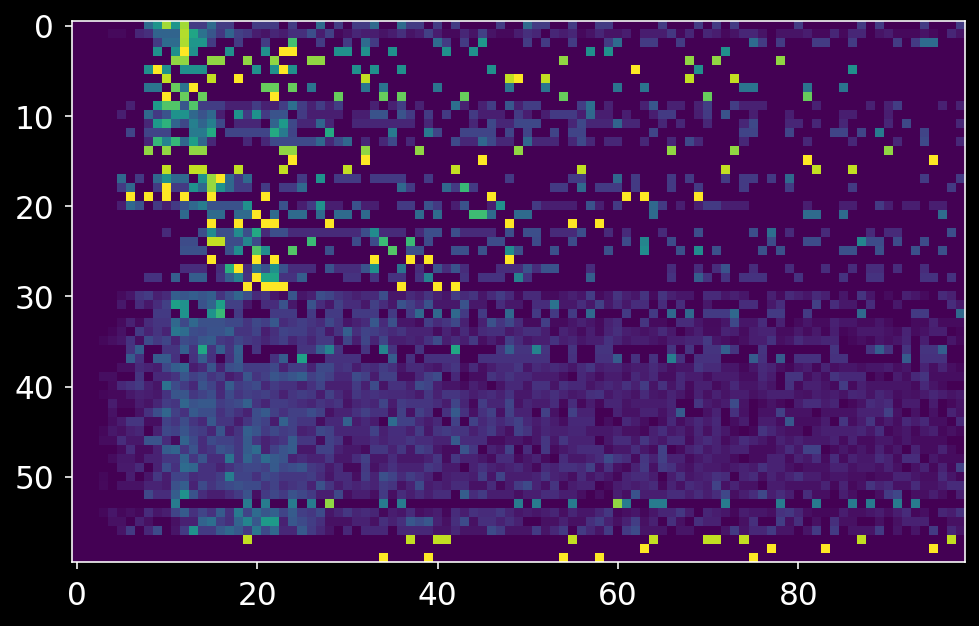

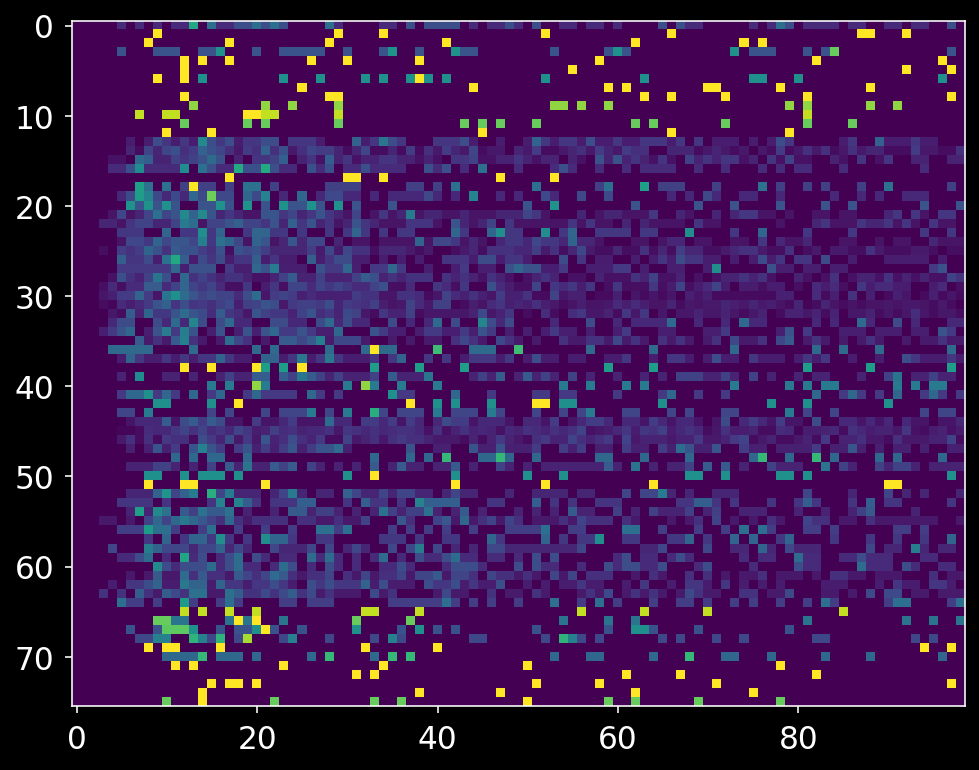

In [22]:
# plt.style.use('dark_background')
plt.figure(figsize=(8,8))
plt.imshow(hists_control,cmap='viridis',vmin=0, vmax=.1)
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(hists_pae,cmap='viridis',vmin=0, vmax=.1)
plt.show()